# Google Political Advertising Exploration
## Info 2950 Phase IV
### Eliza Salamon, Laurel Prime, Melissa LaFountain
***

# Introduction

Our group hoped to find connections between various criteria and political advertisements in the United States, working from data collected in a Google Transparency Report. The research questions that our group aimed to answer were, “How do different targeting attributes such as age, gender, and geotargeting affect ad type and exposure?,” “How are ads distributed geographically across the country?,” and “How does ad spend affect impressions generated?” Answering these questions can provide valuable insight for future political campaigns. To answer these questions, we completed three different analyses. 

The first analysis, an exploration of the relationship between geographic targeting and political party, was done with a logistic regression model and a heat map indicating targeted locations. This analysis shows that there is a relationship between geotargeting and political party affiliation, but our data was somewhat limited in predicting a strong relationship between the two.

Our second analysis looked into age targeting and ad impressions. We completed this analysis using a linear regression model. Results from this analysis show an insignificant relationship between age targeting and advertisement impressions. 

Our final analysis took a look at the relationship between ad spending and impressions, and was done by creating a histogram. The histogram revealed several points, among them being the fact that many of the ads with the most impressions were produced without overly high ad spend. 

While we ultimately did not find very significant relationships between our variables, we believe that our results are still important. For example, discovering that there is not a significant relationship between age targeting and ad impressions can help politicians to know what not to focus on in future campaigns, so that they can give more attention to relationships that may prove to be more significant.  

# Data Description

##### What are the observations (rows) and the attributes (columns)?

The observations of the Google data are different political ads. The attributes are the kind of advertisement (text, video, or image),  the region the ad is from, the name of the advertiser, the range of dates and number of days that the ad was released, the amount of impressions the ad had, spending range for the ad, target age, target gender, any locations targeted or avoided by the advertisement, and the maximum and minimum amounts of money spent for each ad. 

The observations of the zipcode data are different zipcodes in the United States and territories. The columns are zipcode, zipcode type, city, state, latitude, longitude, whether the zip code is still in use, the population, tax returns, and total wages. The columns we used to add to the google dataset were the city and zipcode.

##### Why was this dataset created?

The dataset was created in order to provide greater transparency in political advertising on Google, YouTube, and partner properties. 

##### Who funded the creation of the dataset?

Google and their “Transparency Report” team funded the creation of this dataset.

##### What processes might have influenced what data was observed and recorded and what was not?

To run election ads, Google requires advertisers to be verified, and observe its policies and applicable laws. Election ads in this report feature a current officeholder or candidate for an elected federal or state office, federal or state political party, or state ballot measure, initiative, or proposition that qualifies for the ballot in a state. The report also includes all ads from advertisers that completed the express notification process related to California candidates for elected office or California ballot measures.

##### What preprocessing was done, and how did the data come to be in the form that you are using?

Preprocessing steps taken by Google’s data originators are not described on the “Transparency Report” website. As a team, we completed our own independent preprocessing in order to narrow down the raw data to items of interest based on our 
research questions. The data was filtered to include only Google Ads targeting the United States, and we deleted some columns present in the raw data which were redundant or not applicable to the US. In order to isolate ads likely to be more influential, we filtered the data to include only ad campaigns with a minimum spending value of $1,000. Additionally, we used a set of US zip code data in order to add information to the raw data about what cities and counties were being targeted by the ads. Finally, some integer columns were added in order to provide a numerical representation of finite categorical variables represented in preexisting data.

##### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

People were aware of their data being collected, because websites requested that they put extensions on their browsers. The extensions gathered data about the ads on users’ Facebook pages. 

##### Cleaned data is hosted in the Cornell Box: https://cornell.box.com/s/2m5uwulla3pfca5qt395ngdonpnx0g9d 

The raw source data is found in the Google Transparency Report on US political ads: 
https://transparencyreport.google.com/political-ads/region/US
The specific file used is google-political-ads-creative-stats.csv

##### Over what timeframe was the data collected?
The time frame is based on the launch date of the Transparency Report for a country or region. For the United States, data has been collected since May 31, 2018, and the data site is updated daily. We downloaded the data from Google on October 7th, 2021.

##### Are there any errors, sources of noise, or redundancies in the dataset?
There are range redundancies for ad observations in certain columns like Impressions, Spend_USD, Age_Targeting, and Geo_Targeting_Included. As an example, several ads have impression ranges of 10K-100K.


##### Does the data set identify any subpopulations?
The data set includes information about gender targeted ads; specifically, it identifies female, male, and unknown gender subpopulations. In addition, the data set includes information about ads’ target audience ages, grouping people by increments of 10 from ages 18-65. As a final example, the data set includes information about geographic subpopulations, indicating specific zip codes, counties, and states targeted by the different ads.  

***

In [1]:
#load all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
from  sklearn.linear_model import LogisticRegression, LinearRegression
import scipy.stats.distributions as dist

# Analysis 1: Examining Geographic Targeting
### -- Preregistration Statement, Regression Model, Visual Mapping, Evaluation of Significance -- 

<b>Preregistration Statement:</b> We will examine the relationship between geographic targeting and type of advertiser. The dataset provides different aspects of geographic targeting in the form of zipcodes, cities, counties, and states.  In order to visualize aspects, we will create a heat map of advertisements using geopandas. In order to assess relationships, we will use dummy variables to represent a distinct set of regions (such states or cities). Additionally, using campaign finance data, we can add information about advertisements' political affiliations. From this, we can portray Democrats as 0 and Republicans as 1 in order to determine relationships between geographic targeting and political party using a logistic regression model.

This analysis will allow us to gain more insight into how geographical targeting is distributed both by location and by party, one of our research questions. Our hypothesis is that different politically afffiliated parties will spend money in different geographic areas, likely based on swing states or districts, although it will be interesting to see just how those differences present themselves.
***

party_dataframe.csv has been created in a seperate file to obtain lists of states targeted by each add

Code for this provided on Github: https://github.com/esalamon17/Info-2950-Project/blob/main/cleaning_party.ipynb

In [2]:
states_df = pd.read_csv('party_dataframe.csv')
states_df.head()

,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TX,UT,VA,VI,VT,WA,WI,WV,WY,Party
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [3]:
print(states_df['Party'].value_counts())

1.0    23181
0.0    13248
Name: Party, dtype: int64


In [4]:
#create series of state counts
state_counts = pd.Series(states_df.sum(axis=0)).reset_index()
state_counts.describe()

,0
count,56.000000
mean,1249.517857
std,3144.885192
min,18.000000
25%,199.750000
50%,378.000000
75%,1183.500000
max,23181.000000


In [5]:
print('State with most ad targeting')
state_counts.max()

State with most ad targeting


index         WY
0        23181.0
dtype: object

In [6]:
print('State with least ad targeting')
state_counts.min()

State with least ad targeting


index      AK
0        18.0
dtype: object

In [7]:
#get list of predictor variables
predictors = list(states_df.columns)
predictors.remove('Party')
#create logistic regression model
log_model = LogisticRegression(max_iter=1000).fit(states_df[predictors].values, states_df['Party'])

In [8]:
#create list of traditional swing states
target_swing_states = np.zeros(55)
swing_states = ['AZ', 'FL', 'GA', 'MI','NV', 'NC', 'OH', 'PA', 'WI']
for p in predictors:
    if p in swing_states:
        index = states_df.columns.get_loc(p)
        target_swing_states[index] = 1

In [9]:
target_swing_states

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0.])

In [10]:
#predict advertiser for swing state targeting
probs_swing = log_model.predict_proba([target_swing_states])
print('Republican: {:.3f}, Democrat: {:.3f}'.format(probs_swing[0][0], probs_swing[0][1]))

Republican: 0.025, Democrat: 0.975


In [11]:
target_dem_states = np.zeros(55)
dem_states = ['CA', 'NY', 'CT', 'HI', 'NJ']
for p in predictors:
    if p in dem_states:
        index = states_df.columns.get_loc(p)
        target_dem_states[index] = 1

In [12]:
probs_dem = log_model.predict_proba([target_dem_states])
print('Republican: {:.3f}, Democrat: {:.3f}'.format(probs_dem[0][0], probs_dem[0][1]))

Republican: 0.001, Democrat: 0.999


In [13]:
target_rep_states = np.zeros(55)
rep_states = ['TX', 'WV', 'MS', 'MO', 'ND']
for p in predictors:
    if p in rep_states:
        index = states_df.columns.get_loc(p)
        target_rep_states[index] = 1

In [14]:
probs_rep = log_model.predict_proba([target_rep_states])
print('Republican: {:.3f}, Democrat: {:.3f}'.format(probs_rep[0][0], probs_rep[0][1]))

Republican: 0.976, Democrat: 0.024


***

#### Evaluating Significance

In [15]:
log_model.score(states_df[predictors].values, states_df['Party'])

0.6728156139339537

Find Baseline Score - 1 is Democrat, 0 is Republican. So, predict Democrat affiliated advertiser 100% of the time.

In [16]:
print('Baseline score: {:.2f}'.format(states_df['Party'].sum()/len(states_df)))

Baseline score: 0.64


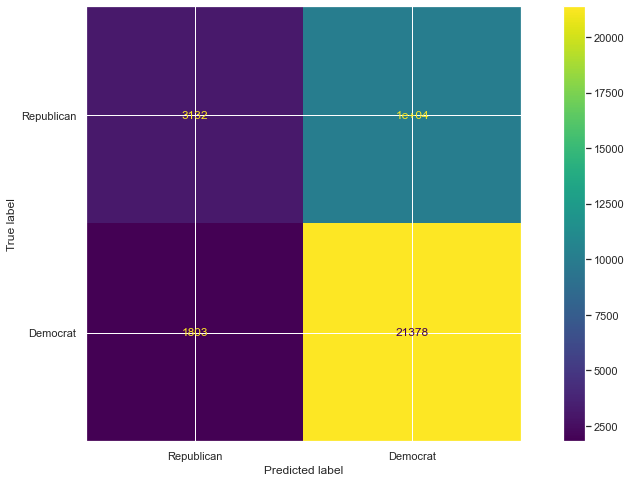

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_true = states_df['Party']
y_pred = log_model.predict(states_df[predictors].values)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['Republican', 'Democrat']);
disp.plot();

In [18]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.24      0.34     13248
         1.0       0.68      0.92      0.78     23181

    accuracy                           0.67     36429
   macro avg       0.66      0.58      0.56     36429
weighted avg       0.66      0.67      0.62     36429



Overall, there does seem to be a moderate amount of insight into political party that can be gained from what states advertisers target. The logistic regression model to predict party from state targeting had about a 67% accuracy which isn't terrible. However, the baseline accuracy of simply predicting Democrat 100% of the time (since the data has a majority Democratic advertisers), was 64%, so there is only a slight increase in accuracy between the model and a naive baseline guess. 

This leads to the largest limitation of this analysis — the imbalance between Democratic and Republican advertisers. First, the FEC political campaign spending data which we used to obtain political party affiliation was not perfectly matched with our Google dataset, so the merged data had only 36,429 entries as compared to the original 81,228. Out of those 36,429, 23,181 were Democrats and 13,248 were Republicans. This large discrepancy between parties led to the high baseline accuracy seen in this report. 

This difference is also shown in the precision and recall scores for the model. Precision scores were moderate for both parties, whereas recall was terrible for Republicans and great for Democrats. This is another reflection of the high number of false negatives when predicting Republican advertisers.

Another limitation is the difference in ad targeting counts between states. The statistics from state counts show a large interquartile range. The least targeted state, Alaska, had only 18 ads targeted to it, whereras the most targeted state, Wyoming, had over 23,000. So, some states had much more information to train the logisitic model, whereas others had much smaller quanities of ads, some which may have been much more heavily skewed Democrat or Republican.

Creating potential groupus of geographic targeting provided some interesting resultst. Using the model to predict the political party of an advertiser who targeted a group of swing states in 2020, it predicts that the advertiser is over 97% likely to be Democratic. Using a group of all heavily Democratic states resulted in an almost 100% likelihood of being Democratic. However when a group of heavily Republican states was passed to the model, it predicted a Republican advertiser with likelihood 97.6%. So, although the data was skewed heavily Democratic, thet model was still able to pick up on distinctions between party and geo targeting.

Another limitation was the lack of cohesion between the FEC data and the Google data. Because the two were not able to be merged flawlessly, we lost a lot of data about political party affiliation that may have made the model much more accurate. 

<b>Big Picture:</b> 
Advertising is an essential part of running political campaigns. Choosing which locations to advertise to is based on many factors, one of those being state polling. And although those polls are calculated by much better data scientists than us, they are still wrong a lot of the time! It is interesting to look at what areas of the country seem heavily targeted, and it does appear at a glance to be areas with swing counties. 
    
Just as our data became skewed towards Democratic advetisers due to the data we chose, the scope of advertising that an individual sees is highly dependent on their personal choices. Factors such as what tv channels one watches, what newspaper one reads, who ones friends are on Facebook, and what ads the Google algorithm reccomends are different from person to person. 


#### Mapping Geographic Targeting with Geopandas

In [19]:
#mid party df is simply a dataframe saved at a midpoint of the party_dataframe cleaning process
geo_df = pd.read_csv('mid_party_df.csv')
geo_df.head()

,Geo_Targeting_Included,party,Party_Encoded
0,United States,REP,0.0
1,United States,REP,0.0
2,"NJ-2,New Jersey,United States",REP,0.0
3,"NJ-2,New Jersey,United States",REP,0.0
4,"NJ-2,New Jersey,United States",REP,0.0


In [20]:
#create list of geotargeting column
geo_lists = [item.split(',') for item in geo_df['Geo_Targeting_Included']]
geo_df['Geo_Targeting_Included'] = geo_lists
geo_df.head()

,Geo_Targeting_Included,party,Party_Encoded
0,[United States],REP,0.0
1,[United States],REP,0.0
2,"[NJ-2, New Jersey, United States]",REP,0.0
3,"[NJ-2, New Jersey, United States]",REP,0.0
4,"[NJ-2, New Jersey, United States]",REP,0.0


In [21]:
df_zips = geopandas.read_file('cb_2018_us_zcta510_500k/cb_2018_us_zcta510_500k.shp')
df_zips.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [22]:
#rename zip column
df_zips.rename(columns={'ZCTA5CE10': 'Zip_Code'}, inplace = True)
df_zips = df_zips.astype({'Zip_Code': 'int32'})
df_zips.head()

,Zip_Code,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [23]:
#read state outline file and remove outlying states and territories
df_us = geopandas.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
df_us = df_us[~df_us.STUSPS.isin(['AK','HI', 'AA', 'AE','AP','PR','RI','VI'])]
df_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [24]:
#iterate to get zip code values 
numeric_df = pd.DataFrame(columns=['Zip_Code', 'Party_Encoded'])
for index, row in geo_df.iterrows():
    #go through list of geotargeting
    for location in geo_df.iloc[index, 0]:
        if location.isdigit():
            loc_int = int(location)
            party = geo_df.iloc[index, 2]
            dict = {'Zip_Code': loc_int, 'Party_Encoded': party}
            numeric_df = numeric_df.append(dict, ignore_index=True)


In [25]:
numeric_df.head()

,Zip_Code,Party_Encoded
0,15047.0,1.0
1,48075.0,1.0
2,32202.0,1.0
3,15047.0,1.0
4,48033.0,1.0


In [26]:
#change columns to type int
numeric_df = numeric_df.astype('int32')

In [27]:
#merge shape file with zip code and party dataframe
merged = df_zips.merge(numeric_df, on = 'Zip_Code')
merged.head()

,Zip_Code,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Party_Encoded
0,4354,8600000US04354,04354,105047926,7796255,"POLYGON ((-69.44550 44.46384, -69.39599 44.457...",1
1,4354,8600000US04354,04354,105047926,7796255,"POLYGON ((-69.44550 44.46384, -69.39599 44.457...",1
2,98304,8600000US98304,98304,890510652,10512605,"POLYGON ((-122.17145 46.82080, -122.17142 46.8...",0
3,98304,8600000US98304,98304,890510652,10512605,"POLYGON ((-122.17145 46.82080, -122.17142 46.8...",1
4,98304,8600000US98304,98304,890510652,10512605,"POLYGON ((-122.17145 46.82080, -122.17142 46.8...",1


In [28]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0, 'red'), (1, 'blue')])


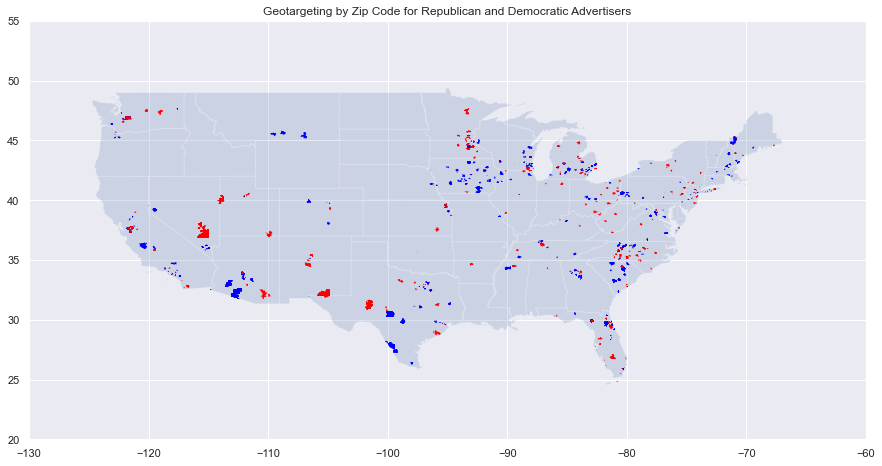

In [29]:
fig, ax = plt.subplots();
df_us.plot(ax=ax, alpha=0.2);
ax.set_xlim([-130, -60]);
ax.set_ylim([20, 55]);
merged.plot(column='Party_Encoded', cmap=cmap, ax=ax, linewidth=0);
plt.title('Geotargeting by Zip Code for Republican and Democratic Advertisers');

This map shows zip code areas where ads in our data are targeted, and by which political party. At a glance, there are clearly large areas of the country that were not targeted, perhaps some of those were left out in the merge with the FEC data. There do seem to be significant blocks of targeting in areas of Texas, Georgia, Arizona, Florida, and the Midwest, all areas where we saw particular interest during the 2020 election. 

***

# Analysis 2: Examining Age Targeting and Ad Impressions

### -- Preregistration Statement, Regression Model, Data Graphing -- 
<b>Preregisration Statement:</b>We will look into the relationship between two variables: age targeting and impressions of the ads. The relationship between age targeting and ad impressions is important because it can provide information about which age groups need to be targeted more in present and future campaigns. We will determine this relationship by creating a linear regression model for the variables, with categorical variables being represented by numerical values. The linear regression model allows for predictions to be made about future data, making it an important method to use to determine the relationship between age-targeting in ads and their impressions. These analysis will help answer one of our research questions regarding how different targeting attributes (e.g. age, gender, geo-targeting) affect ad type and ad exposure. Our hypotheses are that there is a statistically significant relationship between age-targeting in ads and ad impressions, and that ads targeted towards older generations will have more impressions because research has shown that older age groups are more likely to vote. If the second hypothesis is correct, it will tell us that younger generations should be targeted more by ad campaigns to increase voter turnout in that demographic. Even if the first hypothesis is incorrect and there is no significant relationship between age-targeting and ad impressions, this information could still be useful. Knowing this would allow politicians to focus their ads on relationships that are potentially more significant, for example, socioeconomic status and ad impressions.

In [30]:
data = pd.read_csv('final_dataframe.csv')
data.head()

,Ad_Type,Regions,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Areas_Targeted,Ad_Type_Code,Impression_Type
0,Text,US,ALEX FOR AZ,2020-07-08,2020-08-04,28,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0,"{'Phoenix', 'Fort mcdowell', 'Fountain hills',...",2,1
1,Text,US,ALEX FOR AZ,2020-07-07,2020-08-04,29,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0,"{'Phoenix', 'Fort mcdowell', 'Fountain hills',...",2,1
2,Text,US,"PETE FOR AMERICA, INC.",2020-02-22,2020-02-22,1,≤ 10k,1k-50k,Not targeted,Not targeted,Nevada,Not targeted,1000,50000.0,{'Nevada'},2,1
3,Text,US,"PETE FOR AMERICA, INC.",2019-08-14,2019-10-15,62,≤ 10k,1k-50k,Not targeted,Not targeted,New Hampshire,Not targeted,1000,50000.0,{'New Hampshire'},2,1
4,Text,US,"PETE FOR AMERICA, INC.",2020-02-27,2020-02-29,3,≤ 10k,1k-50k,Not targeted,Not targeted,South Carolina,Not targeted,1000,50000.0,{'South Carolina'},2,1


In [31]:
#reducing to only necessary columns, getting rid of ads that aren't age targeted
age_df = data[['Age_Targeting', 'Impressions', 'Impression_Type']]
age_df = age_df.loc[data['Age_Targeting'] != 'Not targeted']
age_df.reset_index(drop = True)

,Age_Targeting,Impressions,Impression_Type
0,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",≤ 10k,1
1,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",≤ 10k,1
2,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",≤ 10k,1
3,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",≤ 10k,1
4,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",≤ 10k,1
...,...,...,...
44988,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",> 10M,5
44989,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",> 10M,5
44990,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",> 10M,5
44991,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",> 10M,5


In [32]:
#make age targeting column into list
age_list = [x.split(', ') for x in age_df['Age_Targeting']]

In [33]:
age_df['Age_Targeting_List'] = age_list

In [34]:
#create dummy variables for each age range
age_dummies = pd.get_dummies(age_df['Age_Targeting_List'].explode()).groupby(level=0).sum()
age_dummies['Impression_Type'] = age_df['Impression_Type']
age_dummies.reset_index(drop = True)
age_dummies.head()

,18-24,25-34,35-44,45-54,55-64,Unknown age,≤18,≥65,Impression_Type
77,1,1,1,1,1,1,1,1,1
94,1,1,1,1,1,1,0,1,1
96,1,1,1,1,1,1,0,1,1
97,1,1,1,1,1,1,0,1,1
98,1,1,1,1,1,1,0,1,1


In [35]:
#delete unknown age
age_dummies.drop(columns = ['Unknown age'], inplace = True)

In [36]:
#create series of column sums
arr = age_dummies.drop(columns = ['Impression_Type']).sum(axis = 0)
print(arr)

18-24    42673
25-34    42994
35-44    44151
45-54    44210
55-64    44055
≤18      19333
≥65      43991
dtype: int64


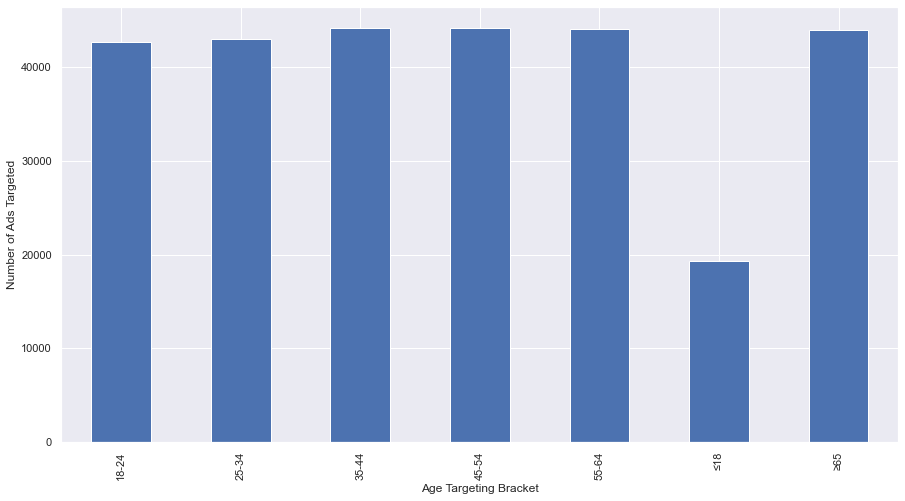

In [37]:
#plot column sums
arr.plot(kind = 'bar');
plt.xlabel('Age Targeting Bracket');
plt.ylabel('Number of Ads Targeted');

All age brackets seem to have a pretty uniform distribution, except for <18 which makes sense because that age bracket can't vote!

In [38]:
predictors_ages = list(age_dummies.columns)
predictors_ages.remove('Impression_Type')
#create linear regression model
lin_model = LinearRegression().fit(age_dummies[predictors_ages], age_dummies['Impression_Type'])

In [39]:
lin_model.score(age_dummies[predictors_ages], age_dummies['Impression_Type'])

0.0009268657310729234

So, this is clearly a terrible model, age targeting is not particuarly indicative of how many impressions an ad will recieve

In [40]:
#try filtering by impressions over 1 million -- impression type 4 or 5
impressions_filtered = age_dummies.loc[(age_dummies['Impression_Type'] == 4) | (age_dummies['Impression_Type'] == 5)]
#create sum array again
arr_filtered = impressions_filtered.drop(columns = ['Impression_Type']).sum(axis = 0)
print(arr_filtered)

18-24    4901
25-34    4913
35-44    5026
45-54    5040
55-64    5051
≤18      2353
≥65      5047
dtype: int64


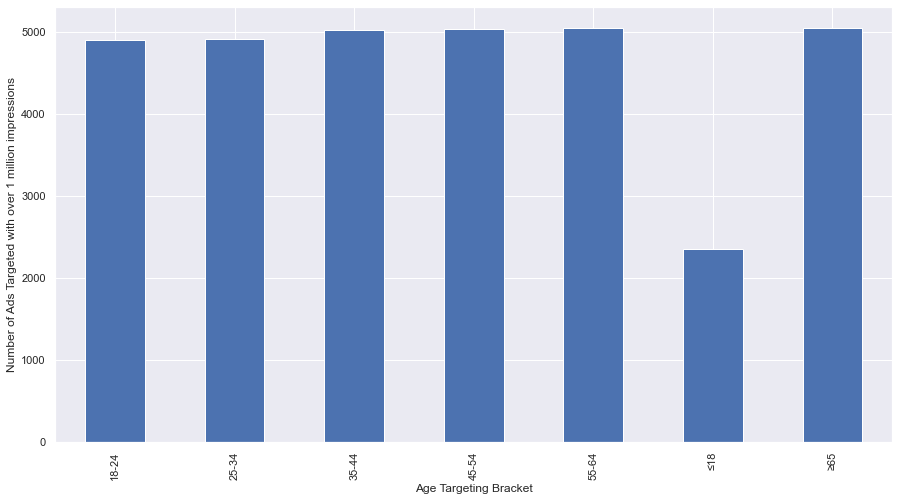

In [41]:
arr_filtered.plot(kind = 'bar');
plt.xlabel('Age Targeting Bracket');
plt.ylabel('Number of Ads Targeted with over 1 million impressions');

It appears that our original preregistered hypothesis was rejected; there is no indication that age group targeting has a impact on the number of impressions the advertisement recieves. The linear regression model proved to be a poor measure of prediction, likely because of the discrete nature of both the predictor and response variables. Additionally, bar plots of the number of ads targed to each age group have a pretty uniform distribution, with one exception. The age group of <18 was targeted at a much lower rate, which makes sense becasue they are unable to vote and are thus less important to political interests. Even when the data was filtered to just include ads with over a million impressions, there was still a pretty uniform distribtion (except for <18, again.)

Based on thte way the Google dataset was formatted, many advertisements target all or many age groups. Because there is not breakdown between how many impressions there were for each age group in these cases, we lost out on a lot of potential insight. Additionally, because impressions were binned to large intervals, the linear regression model was less successful. It is still possible that age targeting leads to different amounts of ad impressions; maybe younger age groups lead to more impressions because they spend more time on Google. However, based on teh data available to us, we were unable to find a correlation.

<b>Big Picture:</b> Google advertisements are only one portion of all political advertising. Age is an important factor that political groups must take into consideration as some age blocs vote at higher rates or are more important in certain areas. The location in which ads are placed on Google is an outside influence on number of Impressions, a variable based on many factors. So, although we did not find that age targeting was an indictor of number of impressions, it is likely a very complex mechanism. Our barplots show an even distribution across ages except for the <18 bracket. Although this difference makes sense, there were still thousands of advertisents targeted to people who are unable to vote. Further analysis and research could look into what ads targeting the <18 bracket look like and what political groups are hoping to accomplish by targeting them.

***

#  Analysis 3: Examining Ad Spending and Impressions
### -- Preregistration Statement, Data Graphing, Evaluation of Significance -- 
<b>Preregistration Statement: </b>We recognize that dealing with wide-ranging data in certain columns as it stands is tricky, so we’re opting to keep the recorded ranges (e.g. for “impressions”, we’ll go with the bins of <10K, 10K-100K, etc.) as long as these reveal significant differences between the bins, which our Histogram of Ad Spending Counts implies. In addition, we will aim to take a deeper dive into one of the bins (e.g. for Histogram of Ad Spending) and use a bootstrapping test to see if impressions are statistically different between spending bins. For example, we will identify possible variations of data that occur in the 100K-1M “impressions” bin where an impression is the metric used to quantify the number of digital views or engagements that a certain political ad experiences. Using the “impressions” variable in  this analysis is important, because it’s among the key variables for which the Transparency Report’s data is segmented into wide-ranging bins. Exploring variations in “impressions” bins will help us zoom in to discern insightful trends on the count of different impression ranges and corresponding spend range minimums. In terms of our hypothesis for this preregistered analysis, I expect that the greatest count of impressions will fall within the 100K-1M range. These hypothetical results will contribute to our overall project by clarifying significant differences between “impressions” bins.

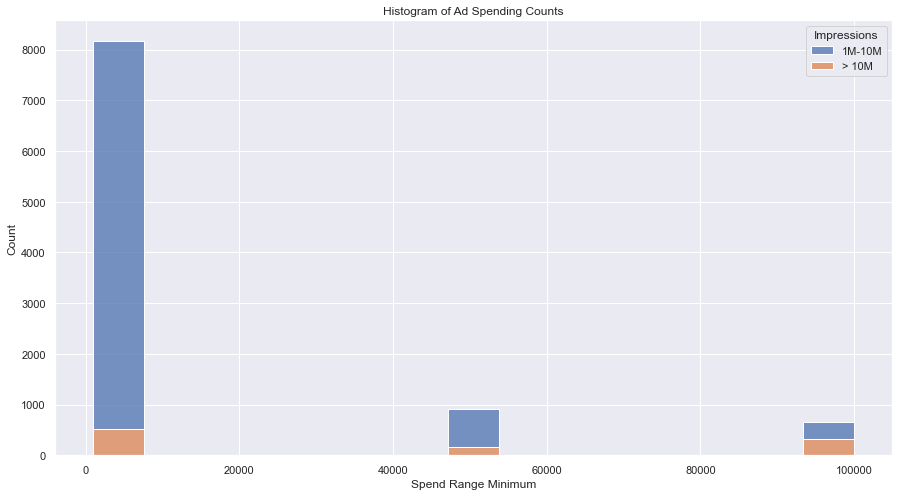

In [42]:
#filter data to just those with impressions over a million
clean_data = data.loc[(data['Impressions']=='1M-10M') | (data['Impressions']=='> 10M')]
sns.histplot(x = 'Spend_Range_Min_USD', hue = 'Impressions', data = clean_data, multiple = 'stack')
plt.xlabel('Spend Range Minimum');
plt.title('Histogram of Ad Spending Counts');

In [43]:
#summary stats
clean_data[['Impressions', 'Spend_USD']].describe()

,Impressions,Spend_USD
count,9744,9744
unique,2,3
top,1M-10M,1k-50k
freq,8754,8168


In [44]:
clean_data[['Impressions', 'Spend_USD']].mode()

,Impressions,Spend_USD
0,1M-10M,1k-50k


The **"Histogram of Ad Spend Counts"** provides several key insights: 

1. Foremost, the majority of ads (7,500) that fall under the '1M-10M' impressions bucket have a spend range minimum that's between \\$0-10k. About 833 ads in the same bucket have a spend range minimum that's between \\$40-60k. Lastly, about 333 ads in the '1M-1M' impressions bucket have a spend range minimum that's almost \\$100k.

**Big picture:** overall, even the ads generating the second highest number of impressions (1M-10M) are produced pretty economically. Only about 13\% of the ads have a spend range minimum of \\$40-60k or 100k.

2. About 500 ads in the '> 10M' bucket have a spend range minimum that's between \\$0-10k. About 167 ads have a spend range minimum that's between \\$40-60k. Lastly, about 333 ads in the '> 10M' impressions bucket have a spend range minimum that's almost \\$100k.

**Big picture:** Half of all ads generating the highest number of impressions (> 10M) are produced pretty economically. The fraction of items that have a larger spend range minimum of \\$40-60k or \\$100k is, however, significantly greater (50\%) than it is for the '1M-10M' bucket. This suggests that advertising committees are, on average, more willing to invest greater sums of money to produce > 10M impressions, which makes sense. They will be willing to spend more to achieve greater return on investment.
***

**Big picture:**  Our **summary stats** lend the following insights:

1. 'Impressions' and 'Spend_USD' are assessed for a total of 81,228 ads.
2. The dataframe contains 5 unique values for 'Impressions' and 3 unique values for 'Spend_USD'.
3. The highest range of values for 'Impressions' is 100k-1M; the highest range of values for 'Spend_USD' is 1k-50k.
4. For 'Impressions', the value that occurs with the greatest frequency occurs in 42,633 ads. For 'Spend_USD', the value that occurs with the greatest frequency occurs in 79,110 ads. 

Finally, DF.mode() results indicate that the **mode for the variables**, 'Impressions' and 'Spend_USD', is 100k-1M and 1k-50k respectively.

In [91]:
#### Evaluation of Significance

In [76]:
df_subset = data[['Impressions', 'Spend_Range_Min_USD']]
df_subset.head()

,Impressions,Spend_Range_Min_USD
0,≤ 10k,1000
1,≤ 10k,1000
2,≤ 10k,1000
3,≤ 10k,1000
4,≤ 10k,1000


In [77]:
props_over_million = {}
#iterate through min spending 
for spending in df_subset['Spend_Range_Min_USD'].unique():
    #subset by spending interval
    spend_subset = df_subset.loc[df_subset['Spend_Range_Min_USD'] == spending]
    #get number of impressions over 1 million
    num_over_million = len(spend_subset.loc[(spend_subset['Impressions'] == '1M-10M') | (spend_subset['Impressions'] == '> 10M')])
    #append proportion
    props_over_million[spending] = num_over_million/len(spend_subset)
                                            

In [78]:
props_over_million

{1000: 0.10324864113260018,
 50000: 0.7216494845360825,
 100000: 0.7771295215869312}

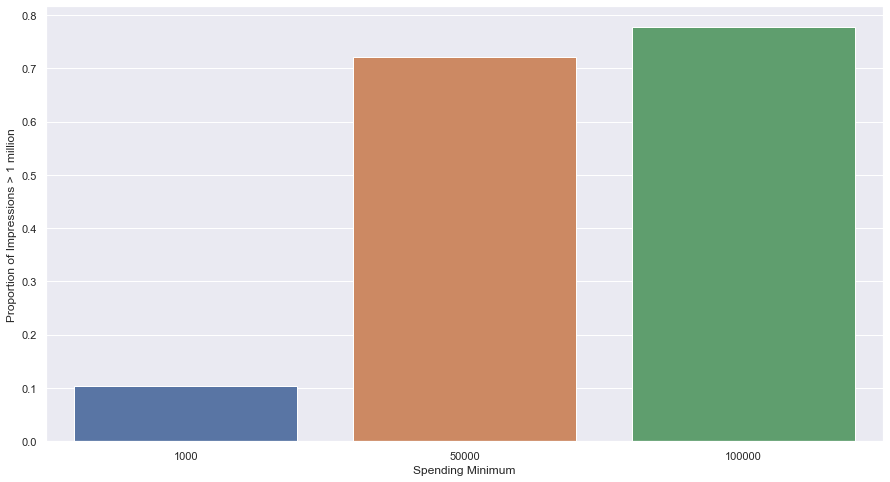

In [79]:
x = list(props_over_million.keys())
y = list(props_over_million.values())
sns.barplot(x=x, y=y);
plt.xlabel('Spending Minimum');
plt.ylabel('Proportion of Impressions > 1 million');

##### Perform 3 pairwise hypothesis tests to see whether spending has an impact on high impression with a significance level of 0.05.

#### Null Hypothesis: Spending has no impact on impression count, i.e. proportion of impressions over one million is equal for each of the 3 spending category minimums: \\$1,000, \\$50,000, and \\$100,000

In [80]:
#compute some necessary values and subsets
df_1000 = df_subset.loc[df_subset['Spend_Range_Min_USD'] == 1000]
df_50000 = df_subset.loc[df_subset['Spend_Range_Min_USD'] == 50000]
df_100000 = df_subset.loc[df_subset['Spend_Range_Min_USD'] == 100000]

num_1000 = len(df_1000.loc[(df_1000['Impressions'] == '1M-10M') | (df_1000['Impressions'] == '> 10M')])
num_50000 = len(df_50000.loc[(df_50000['Impressions'] == '1M-10M') | (df_50000['Impressions'] == '> 10M')])
num_100000 = len(df_100000.loc[(df_100000['Impressions'] == '1M-10M') | (df_100000['Impressions'] == '> 10M')])



In [81]:
def compute_pvalue(val1, val2, val1_num, val2_num, df1, df2):
    '''
    val1: First spending bin
    val2: Second spending bin
    val1_num: number of ads in bin 1 with ≥ 1 million views
    val2_num: number of ads in bin 1 with ≥ 1 million views
    df1: subset data frame of bin 1
    df2: subset data frame of bin 2
    
    Returns: p-value of two-tailed t-test between proportions of two spending values
    '''
    #get subsets and proportion of both subsets
    subset = df_subset.loc[(df_subset['Spend_Range_Min_USD'] == val1) | (df_subset['Spend_Range_Min_USD'] == val2)]
    proportion = len(subset.loc[(subset['Impressions'] == '1M-10M') | 
                                                    (subset['Impressions'] == '> 10M')])/len(subset)
    #calculate variance and standard error
    variance = proportion * (1 - proportion)
    standard_error = np.sqrt(variance * (1 / val1_num + 1 / val2_num))
    print("Sample Standard Error for {} and {}: {:.4f}".format(val1, val2, standard_error))
          
    difference_estimate = np.abs(val1_num/len(df1) - val2_num/len(df2))
    hypothesized_estimate = 0
    test_stat = (difference_estimate-hypothesized_estimate) / standard_error
    print(" Test Statistic is: {.4f}".format(test_stat))

    pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) 
    print("P-value is: {:.4f}".fropvalue)


#### First, compare the proportions of the \\$1,000 spending minimum to the \\$50,000 one
    

In [82]:
compute_pvalue(1000, 50000, num_1000, num_50000, df_1000, df_50000)

Sample Standard Error for 1000 and 50000: 0.0111
 Test Statistic is 55.90290574571723
P-value is 0.0


#### Then, compare the proportions of the \\$50,000 spending minimum to the \\$100,000 one
    

In [83]:
compute_pvalue(50000, 100000, num_50000, num_100000, df_50000, df_100000)

Sample Standard Error for 50000 and 100000: 0.0223
 Test Statistic is 2.4932432533676105
P-value is 0.012658209285286692


#### Finally, compare the proportions of the \\$1,000 spending minimum to the \\$100,000 one
    

In [84]:
compute_pvalue(1000, 100000, num_1000, num_100000, df_1000, df_100000)

Sample Standard Error for 1000 and 100000: 0.0126
 Test Statistic is 53.345275178715305
P-value is 0.0


**Takeaways**: The p-values for each of the three pairwise tests were < 0.05. So, we rejected our null hypothesis that the proportions are all equal, and confirmed our original hypothesis that there are significant differences between impression counts between different spending bins. Therefore, we can conclude that higher spending does result in more ad impressions.

# Overall Limitations

There are a few different aspects of the data set that areproblematic. In some of the columns (Impressions and Spend_USD) the data is given in very wide ranges. For example, one advertisement is reported to have reached between one hundred thousand and one million people. Having such wide ranges can negatively affect accuracy of data and make it more difficult to make predictions based on the data, since we don’t know how many impressions were made by the ads with more specificity. Additionally, according to the Transparency Report, data was collected by requesting that people use a browser extension that records political ads that they view. This method of data collection excludes individuals who opted out of using the extension, and since we don’t know how many people that was, we may not be getting the most accurate data results.

Geographic Targeting is also grouped in an inconvenient manner. In cleaning the data, I used zip code data to add a new column with city names instead of zip codes where applicable. However, the geographic targeting column still includes a mix of zip codes, states, and counties, which are obviously not the same measurements or types. I was able to work around this by filtering by states when analyzing geographic targeting, but this still misses a decent amount of information.
***

# Source code
Cornell Box where cleaned dataframe and other datasets are housed: https://cornell.box.com/s/xbblomg4twic8bin1vzm6wks5fc6f6us

Github Repository: https://github.com/esalamon17/Info-2950-Project

**Code for cleaning the data is found in the data_cleaning.ipynb file on Github**


# Acknowledgments
Throughout the process of this project, we have gained important and helpful insight from several sources. First, we’d like to acknowledge the 2950 teaching assistants, who have given us feedback and advice on how to best proceed and be successful in our assignments. We would also like to recognize the Gebru et al. article that we used as a resource for our data descriptions. Last, but not least, we would like to acknowledge the source of our project data, a Google Transparency Report on political advertisements in the United States. Other sources, such as zip code data, US census bureau, and FEC data were also necessary to perform our analyses. This data was gathered from the following sources:

Google Transparency Report: https://transparencyreport.google.com/political-ads/region/US

Zip Code Data: http://federalgovernmentzipcodes.us/

US Census Bureau Cartographic Files: https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

FEC Political Committees: https://www.fec.gov/data/browse-data/?tab=committees



##### We also found the following links to be helpful in completing our project:  

Resources with tutorials on geopandas and mapping cartographic data:

https://towardsdatascience.com/redlining-mapping-inequality-in-peer-2-peer-lending-using-geopandas-part-2-9d8af584df0b

https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

Article with code and formulas for performing proportional statistical analyses:

https://medium.com/analytics-vidhya/testing-a-difference-in-population-proportions-in-python-89d57a06254

Stack overflow page with information on the explode method:
https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

# Appendix
#### A bit of extra work we did that didn't make it into the final report:

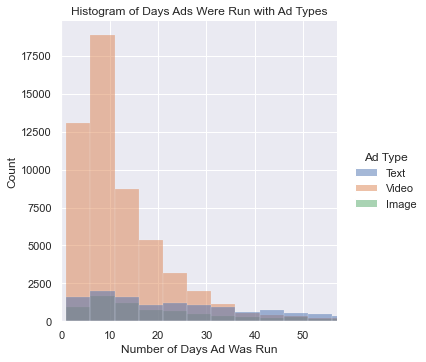

In [85]:
p = sns.displot(x = 'Num_of_Days', data = data, binwidth = 5, hue = 'Ad_Type');
plt.xlabel('Number of Days Ad Was Run');
plt.xlim([0, np.percentile(data['Num_of_Days'], 90)]);
p._legend.set_title('Ad Type');
plt.title('Histogram of Days Ads Were Run with Ad Types');

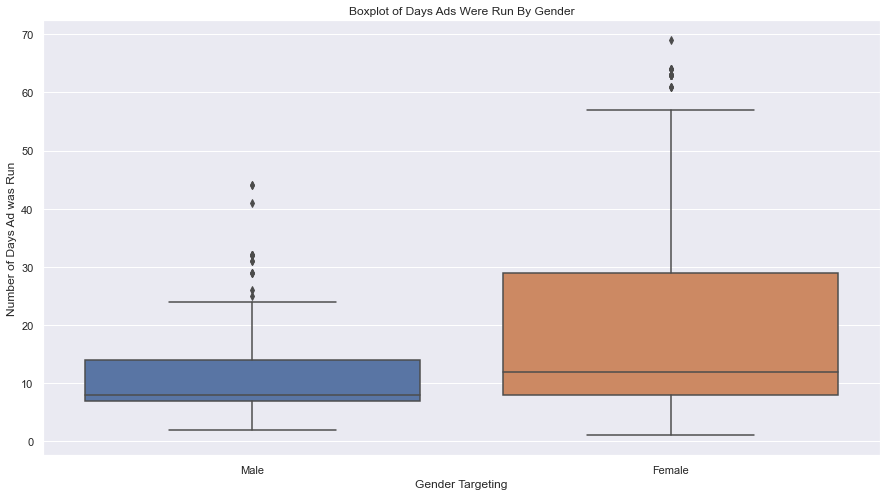

In [86]:
male_or_female = data.loc[(data['Gender_Targeting'] == 'Female') | (data['Gender_Targeting'] == 'Male')]
sns.boxplot(x = male_or_female['Gender_Targeting'], y = 'Num_of_Days', data = data);
plt.ylabel('Number of Days Ad was Run');
plt.xlabel('Gender Targeting');
plt.title('Boxplot of Days Ads Were Run By Gender');

In [87]:
data.loc[:, 'Date_Range_Start'] = pd.to_datetime(data['Date_Range_Start'])
data.loc[:, 'Date_Range_End'] = pd.to_datetime(data['Date_Range_End'])
data['Weekday'] = data['Date_Range_Start'].dt.weekday

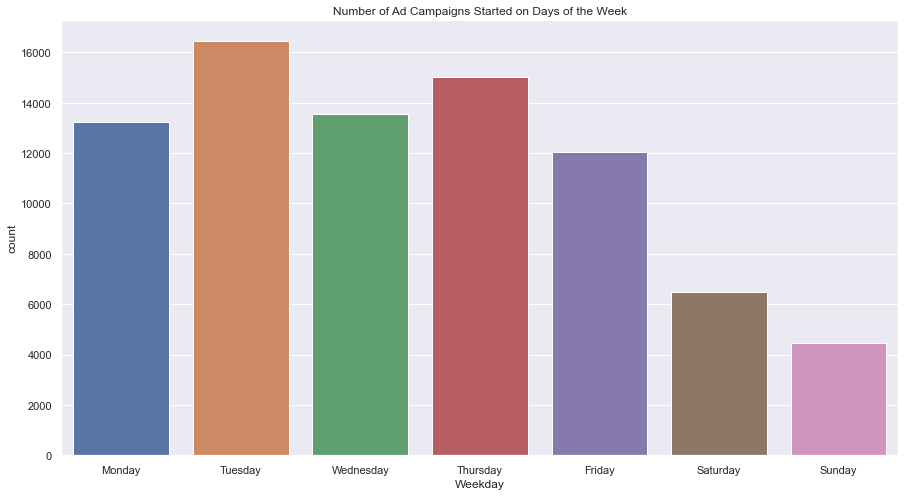

In [88]:
sns.countplot(x='Weekday', data=data);
plt.xticks(np.arange(0, 7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'));
plt.title('Number of Ad Campaigns Started on Days of the Week');

In [89]:
#Get top ten advertisers in new dataframe
top_10_advertisers = pd.DataFrame(data['Advertiser_Name'].value_counts()[:10])
top_10_advertisers.reset_index(inplace = True)
top_10_advertisers.rename(columns = {'index': 'Advertiser', 'Advertiser_Name' : 'Count'}, inplace = True)   

#create new columns in full datafor ad counts and year
values = data['Advertiser_Name'].value_counts().to_dict()
data['Advertiser_Counts'] = data['Advertiser_Name'].map(values)
data['Year'] = data['Date_Range_Start'].dt.year

#create columns
top_10_advertisers['2018_count'] = pd.Series(dtype='int')
top_10_advertisers['2019_count'] = pd.Series(dtype='int')
top_10_advertisers['2020_count'] = pd.Series(dtype='int')
top_10_advertisers['2021_count'] = pd.Series(dtype='int')

#loop through data to get counts for each year
top_10_advertisers['2018_count'] = [len(data[(data['Advertiser_Name'] == item) & (data['Year'] == 2018)]) for item in top_10_advertisers['Advertiser']]
top_10_advertisers['2019_count'] = [len(data[(data['Advertiser_Name'] == item) & (data['Year'] == 2019)]) for item in top_10_advertisers['Advertiser']]
top_10_advertisers['2020_count'] = [len(data[(data['Advertiser_Name'] == item) & (data['Year'] == 2020)]) for item in top_10_advertisers['Advertiser']]
top_10_advertisers['2021_count'] = [len(data[(data['Advertiser_Name'] == item) & (data['Year'] == 2021)]) for item in top_10_advertisers['Advertiser']]

top_10_advertisers


,Advertiser,Count,2018_count,2019_count,2020_count,2021_count
0,BIDEN FOR PRESIDENT,10708,0,125,10583,0
1,MIKE BLOOMBERG 2020 INC,7996,0,965,7031,0
2,"DONALD J. TRUMP FOR PRESIDENT, INC.",4884,66,289,4529,0
3,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,3504,482,1007,2015,0
4,NRSC,1826,386,6,1225,209
5,REPUBLICAN NATIONAL COMMITTEE,1508,458,96,825,129
6,NRCC,1370,528,135,665,42
7,SENATE LEADERSHIP FUND,1297,651,0,646,0
8,CONGRESSIONAL LEADERSHIP FUND,1279,566,32,679,2
9,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,1272,71,112,1026,63


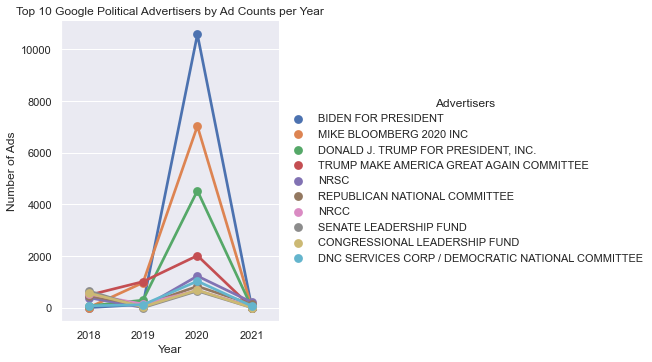

In [90]:
#Transpose rows and columns
df_transpose = top_10_advertisers.transpose()
#Make advertisers the column names
df_transpose.columns = df_transpose.iloc[0]
df_transpose.drop(['Count', 'Advertiser'], inplace = True)
#Add year column
df_transpose['Year'] = [2018, 2019, 2020, 2021]

df_transpose = df_transpose.astype(int)

df_melt = df_transpose.melt('Year', var_name='Advertisers',  value_name='Number of Ads')
g = sns.catplot(x="Year", y="Number of Ads", hue='Advertisers', data=df_melt, kind='point');
plt.title('Top 10 Google Political Advertisers by Ad Counts per Year');